In [6]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-05-04 09:53:19,667: Credentials are already in use. The existing account in the session will be replaced.


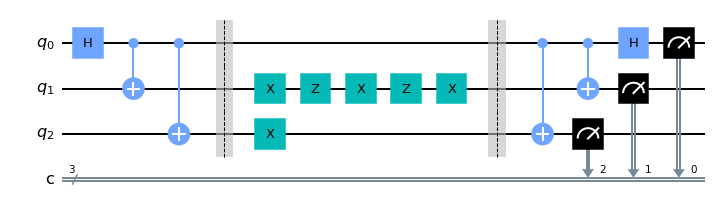

In [20]:
vote = [1,0,1,1]
qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()
if(vote[0]):
    qc.x(1)
if(vote[1]):
    qc.x(1)
    qc.x(2)
if(vote[2]):
    qc.z(1)
    qc.x(1)
    qc.x(2)
if(vote[3]):
    qc.z(1)
    qc.x(1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,1)
qc.h(0)
qc.measure(range(3),range(3))
qc.draw()

In [21]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc,backend,shots=8192)

In [22]:
results = job_simulator.result()

In [23]:
count = results.get_counts(qc)
print(count)

{'110': 8192}


In [24]:
if '000' in count:
    print('Inconcluive')
else:
    print('Vetoed')

Vetoed


In [18]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [ ]:
backend = provider.get_backend('ibmq_bogota')
job_simulator = execute(qc,backend,shots=8192)
results = job_simulator.result()
count = results.get_counts(qc)
print(count)

In [53]:
for i,j in count.items():
    print(i,j/8192)


000 0.001953125
001 0.017578125
010 0.005859375
011 0.0419921875
100 0.015625
101 0.123046875
110 0.060546875
111 0.7333984375
